In [20]:
from model import Layer, Model
from model import train_model
from matplotlib import pyplot as plt

import tensorflow as tf
import numpy as np

np.random.seed(1234)
tf.random.set_seed(1234)

In [23]:
# training set for the PDE
xmin = -1.0
xmax = 1.0
point_counts = 200

inputs = xmin + (xmax - xmin) * np.random.rand(point_counts, 1)
x_train = tf.Variable(initial_value=inputs, dtype='float32')

# training set for BCs
b0 = tf.Variable(initial_value=[[xmin]])
b1 = tf.Variable(initial_value=[[xmax]])

# neural network model
model = Model([
    Layer(input_dim=1, output_dim=40, activation=tf.nn.tanh),
    Layer(input_dim=40, output_dim=40, activation=tf.nn.tanh),
    Layer(input_dim=40, output_dim=40, activation=tf.nn.tanh),
    Layer(input_dim=40, output_dim=40, activation=tf.nn.tanh),
    Layer(input_dim=40, output_dim=40, activation=tf.nn.tanh),
    Layer(input_dim=40, output_dim=40, activation=tf.nn.tanh),
    Layer(input_dim=40, output_dim=1, activation=None),
], xmin, xmax)

# train the model
epochs = 10000
history_loss = train_model(model, x_train, b0, b1, w1=1, w2=1, epochs=epochs, learning_rate=0.0008, warning=False)

# exact solotion
def exact_solution(x, x_min, x_max):
    return  np.sin(2 * np.pi * x / (x_max - x_min))

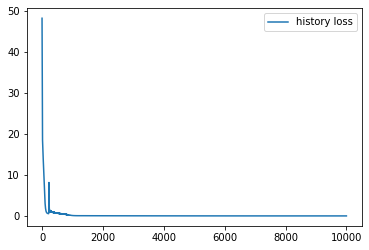

Final loss score: 0.001669244491495192


In [24]:
# plot for the loss score in the training loop
plt.plot(np.array(range(epochs)) + 1, history_loss, label='history loss')
plt.legend()
plt.show()

print(f'Final loss score: {history_loss[-1]}')

Error of training set: 0.0013303462183102965


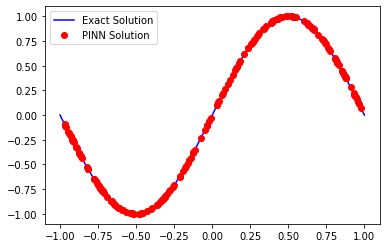

In [25]:
# plot for training set
u_pred = model(x_train)
u_e = exact_solution(x_train, xmin, xmax)
err = np.linalg.norm(u_pred - u_e) / np.linalg.norm(u_e)
print(f'Error of training set: {err}')


plt.plot(np.linspace(-1, 1, 200), exact_solution(np.linspace(-1, 1, 200), xmin, xmax), 'b-', label='Exact Solution')
plt.plot(x_train[:, 0], u_pred, 'ro', label='PINN Solution')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.legend()
plt.savefig('results_for_training_set.png')
plt.show()
plt.close()

Error of test set: 0.0013922472717240453


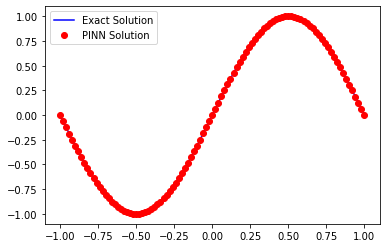

In [26]:
# plot for test set
x_test_value = tf.linspace([xmin, ], [xmax, ], 101)
x_test = tf.Variable(x_test_value, dtype='float32')
u_pred = model(x_test)
u_e = exact_solution(x_test, xmin, xmax)
err = np.linalg.norm(u_pred - u_e) / np.linalg.norm(u_e)
print(f'Error of test set: {err}')

plt.plot(np.linspace(-1, 1, 101), u_e, 'b-', label='Exact Solution')
plt.plot(np.linspace(-1, 1, 101), u_pred, 'ro', label='PINN Solution')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.legend()
plt.savefig('results_for_test_set.png')
plt.show()
plt.close()

---